In [26]:
'''calculate all 3 features for each Action unit'''
import os
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
path="C://Users//vandi//Documents//daicwoz_dataset//action_units_trial//"
target = pd.read_csv("C://Users//vandi//Documents//daicwoz_dataset//au_test.csv")
files=os.listdir(path)
print(files)
#print(target.participant[1])
#df = pd.DataFrame(columns=["participant","AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r", "AU23_c", "AU28_c", "AU45_c","target"])

['302_CLNF_AUs.txt', '303_CLNF_AUs.txt', '304_CLNF_AUs.txt', '372_CLNF_AUs.txt', '374_CLNF_AUs.txt', '375_CLNF_AUs.txt', '376_CLNF_AUs.txt', '377_CLNF_AUs.txt', '379_CLNF_AUs.txt', '380_CLNF_AUs.txt', '381_CLNF_AUs.txt', '382_CLNF_AUs.txt', '383_CLNF_AUs.txt', '385_CLNF_AUs.txt', '386_CLNF_AUs.txt', '388_CLNF_AUs.txt', '389_CLNF_AUs.txt', '390_CLNF_AUs.txt', '391_CLNF_AUs.txt', '392_CLNF_AUs.txt', '393_CLNF_AUs.txt', '395_CLNF_AUs.txt', '397_CLNF_AUs.txt', '400_CLNF_AUs.txt', '401_CLNF_AUs.txt', '402_CLNF_AUs.txt', '403_CLNF_AUs.txt', '404_CLNF_AUs.txt', '406_CLNF_AUs.txt', '409_CLNF_AUs.txt', '412_CLNF_AUs.txt', '413_CLNF_AUs.txt', '414_CLNF_AUs.txt', '415_CLNF_AUs.txt', '416_CLNF_AUs.txt', '417_CLNF_AUs.txt', '418_CLNF_AUs.txt', '419_CLNF_AUs.txt', '420_CLNF_AUs.txt', '422_CLNF_AUs.txt', '423_CLNF_AUs.txt', '425_CLNF_AUs.txt', '426_CLNF_AUs.txt', '427_CLNF_AUs.txt', '428_CLNF_AUs.txt', '429_CLNF_AUs.txt', '430_CLNF_AUs.txt', '433_CLNF_AUs.txt', '434_CLNF_AUs.txt', '436_CLNF_AUs.txt',

# AU01


In [27]:
df_AU01=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    d_newdf["participant"]=i[0:3]
    
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    temp_df_AU01=data.AU01_r[data.AU01_r!=' 0']
    ratio_AU01=temp_df_AU01.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU01
    
    divide_time=(len(data)*0.033)/2
    temp_df_AU01=data.timestamp[data.AU01_r!=' 0']
    AU01_st=0
    AU01_et=0
    AU01_t=-1
    l_AU01=temp_df_AU01.tolist()
   # print(type(l_AU01[1]))
    for j in range(1,len(l_AU01)):
        #if i[0:3]=='372':
           # print(type(l_AU01[j]))
        time=float(l_AU01[j])
        if time<=divide_time:
            AU01_st+=1
        else:
            AU01_et+=1
    if AU01_st>AU01_et:
        AU01_t=0
    else:
        AU01_t=1
    #print(AU01_t)
    d_newdf["portion"]=AU01_t
    
    temp_df_AU01=data.frame[data.AU01_r!=' 0']
    l_AU01=temp_df_AU01.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU01:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j
    mean_AU01=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU01
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU01 = df_AU01.append(d_newdf, ignore_index=True)

In [28]:
df_AU01


,participant,ratio_no_total,portion,mean_duration,target
0,302,0.484732,1,17.642019,0
1,303,0.518569,1,12.545008,0
2,304,0.500021,0,13.269877,0
3,372,0.631878,1,19.590347,1
4,374,0.515661,1,16.260870,0
5,375,0.367763,0,14.173913,0
6,376,0.314172,1,10.345824,1
7,377,0.563911,1,16.405117,1
8,379,0.235848,0,5.961312,0
9,380,0.644770,1,10.262381,1


In [29]:
a=np.array(df_AU01)
y=a[:,4]
x = np.column_stack((df_AU01.ratio_no_total,df_AU01.portion,df_AU01.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


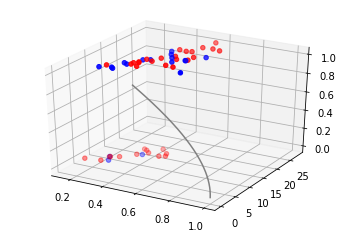

In [31]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU01.portion)
x_points = np.column_stack(df_AU01.ratio_no_total)
y_points = np.column_stack(df_AU01.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU01.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.25      0.40         4

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18

0.8333333333333334


In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
[[12  2]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.50      0.50      0.50         4

    accuracy                           0.78        18
   macro avg       0.68      0.68      0.68        18
weighted avg       0.78      0.78      0.78        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0]
[[10  4]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.43      0.75      0.55         4

    accuracy                           0.72        18
   macro avg       0.67      0.73      0.67        18
weighted avg       0.80      0.72      0.74        18

0.7222222222222222


In [60]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0 14]
 [ 0  4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.22      1.00      0.36         4

    accuracy                           0.22        18
   macro avg       0.11      0.50      0.18        18
weighted avg       0.05      0.22      0.08        18

0.2222222222222222


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
[[9 5]
 [2 2]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.29      0.50      0.36         4

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18

0.6111111111111112


In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=20,random_state=101)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0]
[[9 5]
 [1 3]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.38      0.75      0.50         4

    accuracy                           0.67        18
   macro avg       0.64      0.70      0.62        18
weighted avg       0.78      0.67      0.69        18

0.6666666666666666


# AU02

In [32]:
df_AU02=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    d_newdf["participant"]=i[0:3]
    
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    temp_df_AU02=data.AU02_r[data.AU02_r!=' 0']
    ratio_AU02=temp_df_AU02.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU02
    
    divide_time=(len(data)*0.033)/2
    temp_df_AU02=data.timestamp[data.AU02_r!=' 0']
    AU02_st=0
    AU02_et=0
    AU02_t=-1
    l_AU02=temp_df_AU02.tolist()
    for j in range(1,len(l_AU02)):
        time=float(l_AU02[j])
        if time<=divide_time:
            AU02_st+=1
        else:
            AU02_et+=1
    if AU02_st>AU02_et:
        AU02_t=0
    else:
        AU02_t=1
    #print(AU02_t)   
    d_newdf["portion"]=AU02_t
    
    temp_df_AU02=data.frame[data.AU02_r!=' 0']
    l_AU02=temp_df_AU02.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU02:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU02=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU02
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU02 = df_AU02.append(d_newdf, ignore_index=True)

In [33]:
df_AU02

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.530294,0,0.523795,0
1,303,0.340560,0,0.167361,0
2,304,0.418275,0,0.202128,0
3,372,0.590572,1,0.353493,1
4,374,0.479887,1,0.352947,0
5,375,0.348500,0,0.334273,0
6,376,0.404900,1,0.341146,1
7,377,0.568704,1,0.326706,1
8,379,0.239107,0,0.154790,0
9,380,0.659163,1,0.232895,1


In [34]:
a=np.array(df_AU02)
y=a[:,4]
x = np.column_stack((df_AU02.ratio_no_total,df_AU02.portion,df_AU02.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


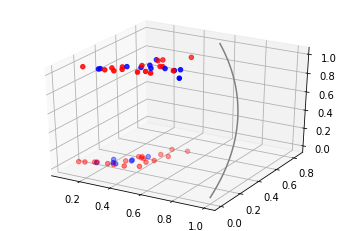

In [35]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU02.portion)
x_points = np.column_stack(df_AU02.ratio_no_total)
y_points = np.column_stack(df_AU02.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU02.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
[[9 5]
 [4 0]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.00      0.00      0.00         4

    accuracy                           0.50        18
   macro avg       0.35      0.32      0.33        18
weighted avg       0.54      0.50      0.52        18

0.5


In [39]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0]
[[ 3 11]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.27      1.00      0.42         4

    accuracy                           0.39        18
   macro avg       0.63      0.61      0.39        18
weighted avg       0.84      0.39      0.37        18

0.3888888888888889


In [40]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0]
[[9 5]
 [1 3]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.38      0.75      0.50         4

    accuracy                           0.67        18
   macro avg       0.64      0.70      0.62        18
weighted avg       0.78      0.67      0.69        18

0.6666666666666666


# AU04

In [42]:
df_AU04=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    #print(i[0:3])
    #print(data)
    temp_df_AU04=data.AU04_r[data.AU04_r!=' 0']
    ratio_AU04=temp_df_AU04.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU04
    
    temp_df_AU04=data.timestamp[data.AU04_r!=' 0']
    AU04_st=0
    AU04_et=0
    AU04_t=-1
    l_AU04=temp_df_AU04.tolist()
    for j in range(1,len(l_AU04)):
        time=float(l_AU04[j])
        if time<=divide_time:
            AU04_st+=1
        else:
            AU04_et+=1
    if AU04_st>AU04_et:
        AU04_t=0
    else:
        AU04_t=1
    #print(AU04_t) 
    d_newdf["portion"]=AU04_t
    
    temp_df_AU04=data.frame[data.AU04_r!=' 0']
    l_AU04=temp_df_AU04.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU04:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU04=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU04
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU04 = df_AU04.append(d_newdf, ignore_index=True)

C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
df_AU04

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.584078,0,1.021703,0
1,303,0.564669,0,0.535801,0
2,304,0.357891,0,0.187950,0
3,372,0.609353,1,0.347216,1
4,374,0.577345,1,0.510489,0
5,375,0.483447,0,0.581342,0
6,376,0.470087,0,0.521016,1
7,377,0.644259,1,0.651899,1
8,379,0.209506,0,0.188226,0
9,380,0.639820,1,0.309110,1


In [44]:
a=np.array(df_AU04)
y=a[:,4]
x = np.column_stack((df_AU04.ratio_no_total,df_AU04.portion,df_AU04.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


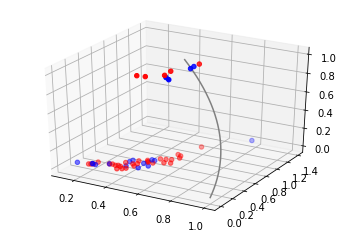

In [45]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU04.portion)
x_points = np.column_stack(df_AU04.ratio_no_total)
y_points = np.column_stack(df_AU04.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU04.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
[[10  4]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.33      0.50      0.40         4

    accuracy                           0.67        18
   macro avg       0.58      0.61      0.58        18
weighted avg       0.72      0.67      0.69        18

0.6666666666666666


In [49]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0 14]
 [ 0  4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.22      1.00      0.36         4

    accuracy                           0.22        18
   macro avg       0.11      0.50      0.18        18
weighted avg       0.05      0.22      0.08        18

0.2222222222222222


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0]
[[9 5]
 [2 2]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.29      0.50      0.36         4

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18

0.6111111111111112


# AU05

In [51]:
df_AU05=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU05=data.AU05_r[data.AU05_r!=' 0']
    ratio_AU05=temp_df_AU05.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU05
    
    temp_df_AU05=data.timestamp[data.AU05_r!=' 0']
    AU05_st=0
    AU05_et=0
    AU05_t=-1
    l_AU05=temp_df_AU05.tolist()
    for j in range(1,len(l_AU05)):
        time=float(l_AU05[j])
        if time<=divide_time:
            AU05_st+=1
        else:
            AU05_et+=1
    if AU05_st>AU05_et:
        AU05_t=0
    else:
        AU05_t=1
    print(AU05_t) 
    d_newdf["portion"]=AU05_t
    
    temp_df_AU05=data.frame[data.AU05_r!=' 0']
    l_AU05=temp_df_AU05.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU05:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU05=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU05
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU05 = df_AU05.append(d_newdf, ignore_index=True)
    
    

0
0
0


C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
1


In [52]:
df_AU05

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.325670,0,0.342745,0
1,303,0.323683,0,0.211483,0
2,304,0.362516,0,0.219898,0
3,372,0.605676,1,0.426303,1
4,374,0.303505,1,0.191433,0
5,375,0.299780,0,0.317710,0
6,376,0.136223,0,0.196665,1
7,377,0.373708,1,0.255048,1
8,379,0.182166,0,0.181915,0
9,380,0.660061,1,0.316387,1


In [53]:
a=np.array(df_AU05)
y=a[:,4]
x = np.column_stack((df_AU05.ratio_no_total,df_AU05.portion,df_AU05.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


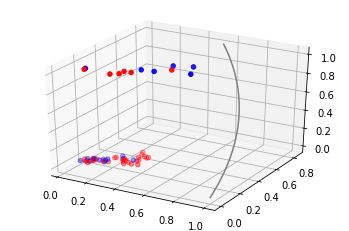

In [54]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU05.portion)
x_points = np.column_stack(df_AU05.ratio_no_total)
y_points = np.column_stack(df_AU05.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU05.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [58]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.00      0.00      0.00         4

    accuracy                           0.56        18
   macro avg       0.36      0.36      0.36        18
weighted avg       0.56      0.56      0.56        18

0.5555555555555556


In [59]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0]
[[12  2]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.60      0.75      0.67         4

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18

0.8333333333333334


# AU06

In [60]:
df_AU06=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU06=data.AU06_r[data.AU06_r!=' 0']
    ratio_AU06=temp_df_AU06.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU06
    
    temp_df_AU06=data.timestamp[data.AU06_r!=' 0']
    AU06_st=0
    AU06_et=0
    AU06_t=-1
    l_AU06=temp_df_AU06.tolist()
    for j in range(1,len(l_AU06)):
        time=float(l_AU06[j])
        if time<=divide_time:
            AU06_st+=1
        else:
            AU06_et+=1
    if AU06_st>AU06_et:
        AU06_t=0
    else:
        AU06_t=1
    print(AU06_t) 
    d_newdf["portion"]=AU06_t
    
    temp_df_AU06=data.frame[data.AU06_r!=' 0']
    l_AU06=temp_df_AU06.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU06:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU06=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU06
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU06 = df_AU06.append(d_newdf, ignore_index=True)

0
0
0


C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
1


In [61]:
df_AU06

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.180344,0,0.241180,0
1,303,0.240073,0,0.364660,0
2,304,0.194231,0,0.297585,0
3,372,0.529207,1,0.500273,1
4,374,0.347795,1,0.432197,0
5,375,0.325911,0,0.639269,0
6,376,0.250772,0,0.392894,1
7,377,0.345704,1,0.501900,1
8,379,0.095290,0,0.218196,0
9,380,0.606035,1,0.396803,1


In [62]:
a=np.array(df_AU06)
y=a[:,4]
x = np.column_stack((df_AU06.ratio_no_total,df_AU06.portion,df_AU06.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


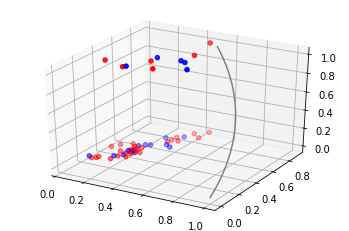

In [63]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU06.portion)
x_points = np.column_stack(df_AU06.ratio_no_total)
y_points = np.column_stack(df_AU06.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU06.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [67]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.00      0.00      0.00         4

    accuracy                           0.61        18
   macro avg       0.37      0.39      0.38        18
weighted avg       0.57      0.61      0.59        18

0.6111111111111112


In [68]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


# AU09

In [75]:
df_AU09=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU09=data.AU09_r[data.AU09_r!=' 0']
    ratio_AU09=temp_df_AU09.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU09
    
    temp_df_AU09=data.timestamp[data.AU09_r!=' 0']
    AU09_st=0
    AU09_et=0
    AU09_t=-1
    l_AU09=temp_df_AU09.tolist()
    for j in range(1,len(l_AU09)):
        time=float(l_AU09[j])
        if time<=divide_time:
            AU09_st+=1
        else:
            AU09_et+=1
    if AU09_st>AU09_et:
        AU09_t=0
    else:
        AU09_t=1
    print(AU09_t) 
    d_newdf["portion"]=AU09_t
    
    temp_df_AU09=data.frame[data.AU09_r!=' 0']
    l_AU09=temp_df_AU09.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU09:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU09=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU09
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU09 = df_AU09.append(d_newdf, ignore_index=True)

0
0
0
1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1


In [76]:
df_AU09

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.495889,0,0.436690,0
1,303,0.401948,0,0.172582,0
2,304,0.421765,0,0.192734,0
3,372,0.584143,1,0.249341,1
4,374,0.444761,1,0.199676,0
5,375,0.437946,0,0.394839,0
6,376,0.261560,0,0.165308,1
7,377,0.545895,1,0.259160,1
8,379,0.568516,0,0.900911,0
9,380,0.677844,1,0.255370,1


In [77]:
a=np.array(df_AU09)
y=a[:,4]
x = np.column_stack((df_AU09.ratio_no_total,df_AU09.portion,df_AU09.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


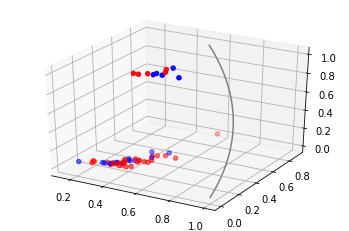

In [78]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU09.portion)
x_points = np.column_stack(df_AU09.ratio_no_total)
y_points = np.column_stack(df_AU09.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU09.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [85]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0]
[[7 7]
 [3 1]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.12      0.25      0.17         4

    accuracy                           0.44        18
   macro avg       0.41      0.38      0.38        18
weighted avg       0.57      0.44      0.49        18

0.4444444444444444


In [87]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0]
[[ 4 10]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.44        14
           1       0.29      1.00      0.44         4

    accuracy                           0.44        18
   macro avg       0.64      0.64      0.44        18
weighted avg       0.84      0.44      0.44        18

0.4444444444444444


In [88]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0]
[[9 5]
 [3 1]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.17      0.25      0.20         4

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18

0.5555555555555556


# AU10

In [89]:
df_AU10=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU10=data.AU10_r[data.AU10_r!=' 0']
    ratio_AU10=temp_df_AU10.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU10
    
    temp_df_AU10=data.timestamp[data.AU10_r!=' 0']
    AU10_st=0
    AU10_et=0
    AU10_t=-1
    l_AU10=temp_df_AU10.tolist()
    for j in range(1,len(l_AU10)):
        time=float(l_AU10[j])
        if time<=divide_time:
            AU10_st+=1
        else:
            AU10_et+=1
    if AU10_st>AU10_et:
        AU10_t=0
    else:
        AU10_t=1
    print(AU10_t) 
    d_newdf["portion"]=AU10_t
    
    temp_df_AU10=data.frame[data.AU10_r!=' 0']
    l_AU10=temp_df_AU10.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU10:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU10=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU10
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU10 = df_AU10.append(d_newdf, ignore_index=True)

0
[1]
0
[0]
0
[6]


C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
[13]
1
[2]
0
[5]
0
[12]
1
[16]
0
[2]
1
[10]
0
[16]
0
[0]
1
[7]
0
[8]
0
[11]
0
[17]
0
[14]
1
[9]
0
[9]
0
[1]
0
[2]
0
[7]
0
[5]
0
[7]
0
[9]
0
[11]
0
[0]
0
[0]
0
[2]
0
[10]
0
[12]
0
[10]
0
[16]
0
[3]
0
[3]
0
[7]
0
[10]
0
[3]
0
[3]
1
[12]
0
[0]
1
[6]
0
[20]
0
[5]
0
[0]
0
[1]
0
[3]
0
[10]
1
[2]
0
[0]
0
[0]
1
[1]
1
[19]


In [90]:
df_AU10

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.205075,0,0.249146,0
1,303,0.363695,0,0.408466,0
2,304,0.295614,0,0.308059,0
3,372,0.568179,1,0.518656,1
4,374,0.439817,1,0.409318,0
5,375,0.363095,0,0.745645,0
6,376,0.264745,0,0.351353,1
7,377,0.416667,1,0.414459,1
8,379,0.089836,0,0.247408,0
9,380,0.684692,1,0.544694,1


In [105]:
a=np.array(df_AU10)
y=a[:,4]
x = np.column_stack((df_AU10.ratio_no_total,df_AU10.portion,df_AU10.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


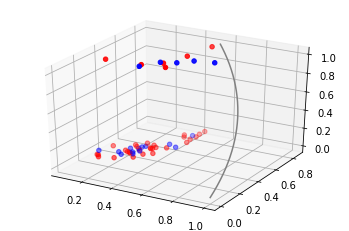

In [91]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU10.portion)
x_points = np.column_stack(df_AU10.ratio_no_total)
y_points = np.column_stack(df_AU10.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU10.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0]
[[7 7]
 [3 1]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.12      0.25      0.17         4

    accuracy                           0.44        18
   macro avg       0.41      0.38      0.38        18
weighted avg       0.57      0.44      0.49        18

0.4444444444444444


In [95]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0]
[[9 5]
 [3 1]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.17      0.25      0.20         4

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18

0.5555555555555556


# AU12

In [98]:
df_AU12=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU12=data.AU12_r[data.AU12_r!=' 0']
    ratio_AU12=temp_df_AU12.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU12
    
    temp_df_AU12=data.timestamp[data.AU12_r!=' 0']
    AU12_st=0
    AU12_et=0
    AU12_t=-1
    l_AU12=temp_df_AU12.tolist()
    for j in range(1,len(l_AU12)):
        time=float(l_AU12[j])
        if time<=divide_time:
            AU12_st+=1
        else:
            AU12_et+=1
    if AU12_st>AU12_et:
        AU12_t=0
    else:
        AU12_t=1
    print(AU12_t) 
    d_newdf["portion"]=AU12_t
    
    temp_df_AU12=data.frame[data.AU12_r!=' 0']
    l_AU12=temp_df_AU12.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU12:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU12=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU12
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU12 = df_AU12.append(d_newdf, ignore_index=True)

0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1


In [99]:
df_AU12

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.213975,0,0.273293,0
1,303,0.388960,0,0.319326,0
2,304,0.299735,0,0.269551,0
3,372,0.540833,1,0.445182,1
4,374,0.465133,0,0.445795,0
5,375,0.268337,0,0.460795,0
6,376,0.275274,0,0.353939,1
7,377,0.368112,1,0.369678,1
8,379,0.090700,0,0.227083,0
9,380,0.585099,1,0.211113,1


In [100]:
a=np.array(df_AU12)
y=a[:,4]
x = np.column_stack((df_AU12.ratio_no_total,df_AU12.portion,df_AU12.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


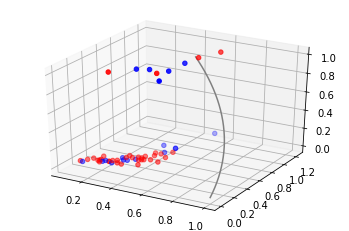

In [101]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU12.portion)
x_points = np.column_stack(df_AU12.ratio_no_total)
y_points = np.column_stack(df_AU12.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU12.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


In [103]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
[[12  2]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.50      0.50      0.50         4

    accuracy                           0.78        18
   macro avg       0.68      0.68      0.68        18
weighted avg       0.78      0.78      0.78        18

0.7777777777777778


In [105]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[[13  1]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.50      0.25      0.33         4

    accuracy                           0.78        18
   macro avg       0.66      0.59      0.60        18
weighted avg       0.74      0.78      0.75        18

0.7777777777777778


In [106]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0]
[[9 5]
 [2 2]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.29      0.50      0.36         4

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18

0.6111111111111112


# AU14

In [109]:
df_AU14=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU14=data.AU14_r[data.AU14_r!=' 0']
    ratio_AU14=temp_df_AU14.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU14
    
    temp_df_AU14=data.timestamp[data.AU14_r!=' 0']
    AU14_st=0
    AU14_et=0
    AU14_t=-1
    l_AU14=temp_df_AU14.tolist()
    for j in range(1,len(l_AU14)):
        time=float(l_AU14[j])
        if time<=divide_time:
            AU14_st+=1
        else:
            AU14_et+=1
    if AU14_st>AU14_et:
        AU14_t=0
    else:
        AU14_t=1
    #print(AU14_t) 
    d_newdf["portion"]=AU14_t
    
    temp_df_AU14=data.frame[data.AU14_r!=' 0']
    l_AU14=temp_df_AU14.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU14:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU14=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU14
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU14 = df_AU14.append(d_newdf, ignore_index=True)

In [110]:
df_AU14

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.319963,0,0.262014,0
1,303,0.523067,0,0.431689,0
2,304,0.426265,0,0.272055,0
3,372,0.675452,1,0.525029,1
4,374,0.511182,1,0.450038,0
5,375,0.306916,0,0.345473,0
6,376,0.418321,0,0.405676,1
7,377,0.476664,1,0.312424,1
8,379,0.267844,0,0.331276,0
9,380,0.703848,1,0.338716,1


In [121]:
a=np.array(df_AU14)
y=a[:,4]
x = np.column_stack((df_AU14.ratio_no_total,df_AU14.portion,df_AU14.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


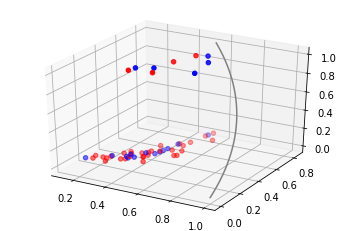

In [111]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU14.portion)
x_points = np.column_stack(df_AU14.ratio_no_total)
y_points = np.column_stack(df_AU14.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU14.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [125]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.00      0.00      0.00         4

    accuracy                           0.61        18
   macro avg       0.37      0.39      0.38        18
weighted avg       0.57      0.61      0.59        18

0.6111111111111112


In [126]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0]
[[9 5]
 [2 2]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.29      0.50      0.36         4

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18

0.6111111111111112


In [127]:
a=np.array(df_AU14)
y=a[:,4]
x = np.column_stack((df_AU14.ratio_no_total,df_AU14.portion,df_AU14.mean_duration))
#print (x),(y)
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)


[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='rbf')
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# AU15

In [119]:
df_AU15=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU15=data.AU15_r[data.AU15_r!=' 0']
    ratio_AU15=temp_df_AU15.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU15
    
    temp_df_AU15=data.timestamp[data.AU15_r!=' 0']
    AU15_st=0
    AU15_et=0
    AU15_t=-1
    l_AU15=temp_df_AU15.tolist()
    for j in range(1,len(l_AU15)):
        time=float(l_AU15[j])
        if time<=divide_time:
            AU15_st+=1
        else:
            AU15_et+=1
    if AU15_st>AU15_et:
        AU15_t=0
    else:
        AU15_t=1
    #print(AU15_t) 
    d_newdf["portion"]=AU15_t
    
    temp_df_AU15=data.frame[data.AU15_r!=' 0']
    l_AU15=temp_df_AU15.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU15:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU15=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU15
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU15 = df_AU15.append(d_newdf, ignore_index=True)

0
[1]
0
[0]
0
[6]


C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
[13]
1
[2]
0
[5]
0
[12]
1
[16]
0
[2]
1
[10]
0
[16]
0
[0]
1
[7]
0
[8]
0
[11]
0
[17]
0
[14]
1
[9]
0
[9]
0
[1]
0
[2]
0
[7]
0
[5]
0
[7]
0
[9]
0
[11]
0
[0]
0
[0]
0
[2]
0
[10]
0
[12]
0
[10]
0
[16]
0
[3]
0
[3]
0
[7]
0
[10]
0
[3]
0
[3]
1
[12]
0
[0]
0
[6]
0
[20]
0
[5]
0
[0]
0
[1]
0
[3]
0
[10]
1
[2]
0
[0]
0
[0]
1
[1]
1
[19]


In [130]:
df_AU15

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.130752,0,0.127867,0
1,303,0.239802,0,0.139624,0
2,304,0.358017,0,0.203600,0
3,372,0.500760,1,0.223386,1
4,374,0.407512,1,0.250942,0
5,375,0.208188,0,0.183465,0
6,376,0.298476,0,0.262144,1
7,377,0.306359,1,0.158030,1
8,379,0.079891,0,0.110153,0
9,380,0.575809,1,0.175516,1


In [128]:
a=np.array(df_AU15)
y=a[:,4]
x = np.column_stack((df_AU15.ratio_no_total,df_AU15.portion,df_AU15.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


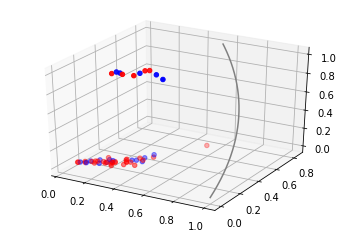

In [129]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU15.portion)
x_points = np.column_stack(df_AU15.ratio_no_total)
y_points = np.column_stack(df_AU15.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU15.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [130]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [131]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [133]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [134]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0]
[[9 5]
 [3 1]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.17      0.25      0.20         4

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18

0.5555555555555556


# AU17

In [135]:
df_AU17=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU17=data.AU17_r[data.AU17_r!=' 0']
    ratio_AU17=temp_df_AU17.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU17
    
    temp_df_AU17=data.timestamp[data.AU17_r!=' 0']
    AU17_st=0
    AU17_et=0
    AU17_t=-1
    l_AU17=temp_df_AU17.tolist()
    for j in range(1,len(l_AU17)):
        time=float(l_AU17[j])
        if time<=divide_time:
            AU17_st+=1
        else:
            AU17_et+=1
    if AU17_st>AU17_et:
        AU17_t=0
    else:
        AU17_t=1
    #print(AU17_t) 
    d_newdf["portion"]=AU17_t
    
    temp_df_AU17=data.frame[data.AU17_r!=' 0']
    l_AU17=temp_df_AU17.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU17:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU17=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU17
    
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU17 = df_AU17.append(d_newdf, ignore_index=True)

C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
df_AU17

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.233741,0,0.239630,0
1,303,0.496144,0,0.450181,0
2,304,0.217695,0,0.197654,0
3,372,0.516525,1,0.318990,1
4,374,0.238818,1,0.197004,0
5,375,0.132532,0,0.254409,0
6,376,0.197056,0,0.244386,1
7,377,0.331502,1,0.272450,1
8,379,0.062529,0,0.126996,0
9,380,0.588167,1,0.247223,1


In [138]:
a=np.array(df_AU17)
y=a[:,4]
x = np.column_stack((df_AU17.ratio_no_total,df_AU17.portion,df_AU17.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


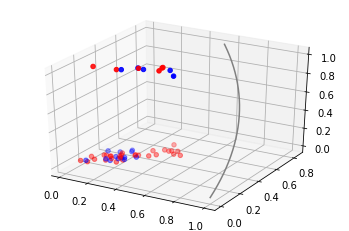

In [139]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU17.portion)
x_points = np.column_stack(df_AU17.ratio_no_total)
y_points = np.column_stack(df_AU17.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU17.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0]
[[8 6]
 [3 1]]
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.14      0.25      0.18         4

    accuracy                           0.50        18
   macro avg       0.44      0.41      0.41        18
weighted avg       0.60      0.50      0.54        18

0.5


In [143]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [144]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0]
[[10  4]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.00      0.00      0.00         4

    accuracy                           0.56        18
   macro avg       0.36      0.36      0.36        18
weighted avg       0.56      0.56      0.56        18

0.5555555555555556


# AU20

In [148]:
df_AU20=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU20=data.AU20_r[data.AU20_r!=' 0']
    ratio_AU20=temp_df_AU20.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU20
    
    temp_df_AU20=data.timestamp[data.AU20_r!=' 0']
    AU20_st=0
    AU20_et=0
    AU20_t=-1
    l_AU20=temp_df_AU20.tolist()
    for j in range(1,len(l_AU20)):
        time=float(l_AU20[j])
        if time<=divide_time:
            AU20_st+=1
        else:
            AU20_et+=1
    if AU20_st>AU20_et:
        AU20_t=0
    else:
        AU20_t=1
    #print(AU20_t) 
    d_newdf["portion"]=AU20_t
    
    temp_df_AU20=data.frame[data.AU20_r!=' 0']
    l_AU20=temp_df_AU20.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU20:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU20=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU20
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU20 = df_AU20.append(d_newdf, ignore_index=True)
    

In [149]:
df_AU20

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.353336,0,0.223451,0
1,303,0.475512,0,0.270485,0
2,304,0.442875,0,0.235891,0
3,372,0.518440,1,0.235479,1
4,374,0.467152,1,0.238155,0
5,375,0.393304,0,0.371912,0
6,376,0.366653,0,0.261244,1
7,377,0.425148,1,0.218039,1
8,379,0.133905,0,0.104674,0
9,380,0.688574,1,0.261115,1


In [150]:
a=np.array(df_AU20)
y=a[:,4]
x = np.column_stack((df_AU20.ratio_no_total,df_AU20.portion,df_AU20.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


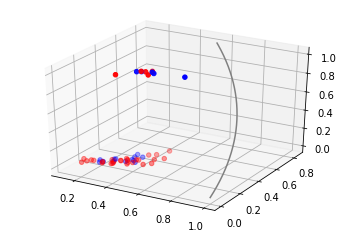

In [151]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU20.portion)
x_points = np.column_stack(df_AU20.ratio_no_total)
y_points = np.column_stack(df_AU20.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU20.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [152]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [153]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [154]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


In [155]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
[[11  3]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.25      0.25      0.25         4

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

0.6666666666666666


# AU25

In [157]:
df_AU25=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU25=data.AU25_r[data.AU25_r!=' 0']
    ratio_AU25=temp_df_AU25.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU25
    
    temp_df_AU25=data.timestamp[data.AU25_r!=' 0']
    AU25_st=0
    AU25_et=0
    AU25_t=-1
    l_AU25=temp_df_AU25.tolist()
    for j in range(1,len(l_AU25)):
        time=float(l_AU25[j])
        if time<=divide_time:
            AU25_st+=1
        else:
            AU25_et+=1
    if AU25_st>AU25_et:
        AU25_t=0
    else:
        AU25_t=1
    #print(AU25_t) 
    d_newdf["portion"]=AU25_t
    
    temp_df_AU25=data.frame[data.AU25_r!=' 0']
    l_AU25=temp_df_AU25.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU25:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU25=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU25
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU25 = df_AU25.append(d_newdf, ignore_index=True)

C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [158]:
df_AU25

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.565698,0,0.462819,0
1,303,0.635493,0,0.441190,0
2,304,0.603213,0,0.453371,0
3,372,0.701632,1,0.611632,1
4,374,0.718938,0,0.702621,0
5,375,0.489403,0,0.375318,0
6,376,0.574530,0,0.417268,1
7,377,0.765884,0,0.706906,1
8,379,0.432049,0,0.238360,0
9,380,0.791100,1,0.642855,1


In [159]:
a=np.array(df_AU25)
y=a[:,4]
x = np.column_stack((df_AU25.ratio_no_total,df_AU25.portion,df_AU25.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


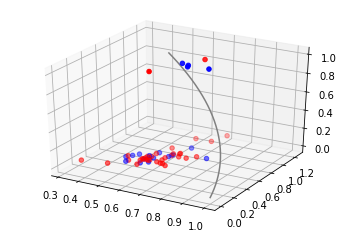

In [160]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU25.portion)
x_points = np.column_stack(df_AU25.ratio_no_total)
y_points = np.column_stack(df_AU25.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU25.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


In [162]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [163]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


In [164]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


In [165]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[[8 6]
 [2 2]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.25      0.50      0.33         4

    accuracy                           0.56        18
   macro avg       0.53      0.54      0.50        18
weighted avg       0.68      0.56      0.59        18

0.5555555555555556


# AU26

In [166]:
df_AU26=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU26=data.AU26_r[data.AU26_r!=' 0']
    ratio_AU26=temp_df_AU26.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU26
    
    temp_df_AU26=data.timestamp[data.AU26_r!=' 0']
    AU26_st=0
    AU26_et=0
    AU26_t=-1
    l_AU26=temp_df_AU26.tolist()
    for j in range(1,len(l_AU26)):
        time=float(l_AU26[j])
        if time<=divide_time:
            AU26_st+=1
        else:
            AU26_et+=1
    if AU26_st>AU26_et:
        AU26_t=0
    else:
        AU26_t=1
   # print(AU26_t) 
    d_newdf["portion"]=AU26_t
    
    temp_df_AU26=data.frame[data.AU26_r!=' 0']
    l_AU26=temp_df_AU26.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU26:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU26=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU26
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU26 = df_AU26.append(d_newdf, ignore_index=True)
    

C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [167]:
df_AU26

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.073582,0,0.420335,0
1,303,0.095143,0,0.188160,0
2,304,0.083260,0,0.172053,0
3,372,0.381311,1,0.410784,1
4,374,0.214123,1,0.183868,0
5,375,0.107850,0,0.314053,0
6,376,0.162968,0,0.250550,1
7,377,0.187644,1,0.142516,1
8,379,0.003925,0,0.118594,0
9,380,0.522580,1,0.297906,1


In [168]:
a=np.array(df_AU26)
y=a[:,4]
x = np.column_stack((df_AU26.ratio_no_total,df_AU26.portion,df_AU26.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


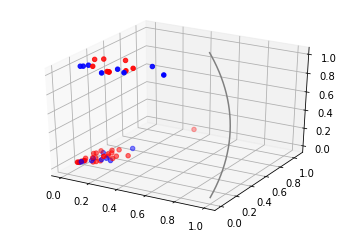

In [169]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU26.portion)
x_points = np.column_stack(df_AU26.ratio_no_total)
y_points = np.column_stack(df_AU26.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU26.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [171]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [172]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [173]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [174]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
[[9 5]
 [3 1]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.17      0.25      0.20         4

    accuracy                           0.56        18
   macro avg       0.46      0.45      0.45        18
weighted avg       0.62      0.56      0.58        18

0.5555555555555556


# AU23

In [176]:
df_AU23=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU231=data.AU23_c[data.AU23_c!=' -100']
    temp_df_AU23=temp_df_AU231[temp_df_AU231!=' 0']
    ratio_AU23=temp_df_AU23.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU23
    
    temp_df_AU23=data.timestamp[data.AU23_c!=' 0']
    AU23_st=0
    AU23_et=0
    AU23_t=-1
    l_AU23=temp_df_AU23.tolist()
    for j in range(1,len(l_AU23)):
        time=float(l_AU23[j])
        if time<=divide_time:
            AU23_st+=1
        else:
            AU23_et+=1
    if AU23_st>AU23_et:
        AU23_t=0
    else:
        AU23_t=1
   # print(AU23_t) 
    d_newdf["portion"]=AU23_t
    
    temp_df_AU23=data.frame[data.AU23_c!=' 0']
    l_AU23=temp_df_AU23.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU23:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU23=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU23
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU23 = df_AU23.append(d_newdf, ignore_index=True)
    

In [177]:
df_AU23

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.628349,0,0.585157,0
1,303,0.437056,0,0.242536,0
2,304,0.692948,0,0.541332,0
3,372,0.646894,1,0.478906,1
4,374,0.960266,0,3.478936,0
5,375,0.795407,0,1.497551,0
6,376,0.807169,0,0.644824,1
7,377,0.975334,0,26.700300,1
8,379,0.931285,0,10.335815,0
9,380,0.876471,1,0.879196,1


In [178]:
a=np.array(df_AU23)
y=a[:,4]
x = np.column_stack((df_AU23.ratio_no_total,df_AU23.portion,df_AU23.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


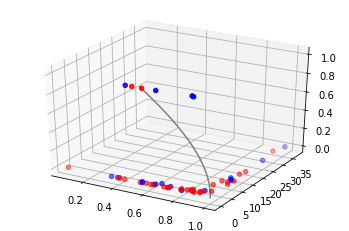

In [179]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU23.portion)
x_points = np.column_stack(df_AU23.ratio_no_total)
y_points = np.column_stack(df_AU23.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU23.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [180]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[[12  2]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.33      0.25      0.29         4

    accuracy                           0.72        18
   macro avg       0.57      0.55      0.56        18
weighted avg       0.70      0.72      0.71        18

0.7222222222222222


In [181]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[[11  3]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.40      0.50      0.44         4

    accuracy                           0.72        18
   macro avg       0.62      0.64      0.63        18
weighted avg       0.75      0.72      0.73        18

0.7222222222222222


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[[11  3]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.40      0.50      0.44         4

    accuracy                           0.72        18
   macro avg       0.62      0.64      0.63        18
weighted avg       0.75      0.72      0.73        18

0.7222222222222222


In [183]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1]
[[ 1 13]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        14
           1       0.13      0.50      0.21         4

    accuracy                           0.17        18
   macro avg       0.23      0.29      0.16        18
weighted avg       0.29      0.17      0.14        18

0.16666666666666666


In [184]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1]
[[7 7]
 [3 1]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.12      0.25      0.17         4

    accuracy                           0.44        18
   macro avg       0.41      0.38      0.38        18
weighted avg       0.57      0.44      0.49        18

0.4444444444444444


# AU28

In [185]:
df_AU28=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU281=data.AU28_c[data.AU28_c!=' -100']
    temp_df_AU28=temp_df_AU281[temp_df_AU281!=' 0']
    ratio_AU28=temp_df_AU28.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU28  
    
    temp_df_AU28=data.timestamp[data.AU28_c!=' 0']
    AU28_st=0
    AU28_et=0
    AU28_t=-1
    l_AU28=temp_df_AU28.tolist()
    for j in range(1,len(l_AU28)):
        time=float(l_AU28[j])
        if time<=divide_time:
            AU28_st+=1
        else:
            AU28_et+=1
    if AU28_st>AU28_et:
        AU28_t=0
    else:
        AU28_t=1
    print(AU28_t) 
    d_newdf["portion"]=AU28_t
    
    temp_df_AU28=data.frame[data.AU28_c!=' 0']
    l_AU28=temp_df_AU28.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU28:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU28=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU28
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU28 = df_AU28.append(d_newdf, ignore_index=True)

0
[1]
0
[0]
0
[6]


C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
[13]
1
[2]
0
[5]
0
[12]
1
[16]
1
[2]
1
[10]
0
[16]
0
[0]
1
[7]
0
[8]
0
[11]
0
[17]
1
[14]
1
[9]
0
[9]
0
[1]
0
[2]
0
[7]
0
[5]
0
[7]
0
[9]
0
[11]
0
[0]
1
[0]
0
[2]
1
[10]
1
[12]
1
[10]
1
[16]
0
[3]
1
[3]
0
[7]
1
[10]
1
[3]
0
[3]
1
[12]
0
[0]
1
[6]
1
[20]
0
[5]
0
[0]
1
[1]
0
[3]
1
[10]
0
[2]
0
[0]
0
[0]
1
[1]
1
[19]


In [205]:
len(df_AU28.participant[df_AU28.target==1])

18

In [186]:
a=np.array(df_AU28)
y=a[:,4]
x = np.column_stack((df_AU28.ratio_no_total,df_AU28.portion,df_AU28.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


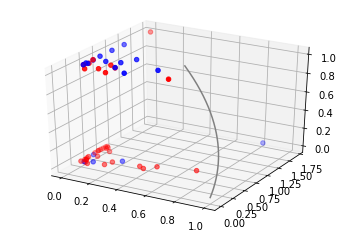

In [187]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU28.portion)
x_points = np.column_stack(df_AU28.ratio_no_total)
y_points = np.column_stack(df_AU28.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU28.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]
[[7 7]
 [1 3]]
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.30      0.75      0.43         4

    accuracy                           0.56        18
   macro avg       0.59      0.62      0.53        18
weighted avg       0.75      0.56      0.59        18

0.5555555555555556


In [189]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]
[[7 7]
 [1 3]]
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.30      0.75      0.43         4

    accuracy                           0.56        18
   macro avg       0.59      0.62      0.53        18
weighted avg       0.75      0.56      0.59        18

0.5555555555555556


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [190]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]
[[7 7]
 [1 3]]
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.30      0.75      0.43         4

    accuracy                           0.56        18
   macro avg       0.59      0.62      0.53        18
weighted avg       0.75      0.56      0.59        18

0.5555555555555556


In [191]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]
[[7 7]
 [1 3]]
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.30      0.75      0.43         4

    accuracy                           0.56        18
   macro avg       0.59      0.62      0.53        18
weighted avg       0.75      0.56      0.59        18

0.5555555555555556


In [192]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0]
[[8 6]
 [2 2]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.25      0.50      0.33         4

    accuracy                           0.56        18
   macro avg       0.53      0.54      0.50        18
weighted avg       0.68      0.56      0.59        18

0.5555555555555556


# AU45

In [193]:
df_AU45=pd.DataFrame(columns=["participant","ratio_no_total","portion","mean_duration","target"])
for i in files:
    d_newdf={}
    data = pd.read_csv(path+i, sep=",", header=None)
    data.columns = ["frame", "timestamp", "confidence", "success", "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU25_r", "AU26_r","AU04_c","AU12_c", "AU15_c", "AU23_c", "AU28_c", "AU45_c"]
    d_newdf["participant"]=i[0:3]
    
    temp_df_AU451=data.AU45_c[data.AU45_c!=' -100']
    temp_df_AU45=temp_df_AU451[temp_df_AU451!=' 0']
    ratio_AU45=temp_df_AU45.count()/len(data)
    d_newdf["ratio_no_total"]=ratio_AU45
    
    temp_df_AU45=data.timestamp[data.AU45_c!=' 0']
    AU45_st=0
    AU45_et=0
    AU45_t=-1
    l_AU45=temp_df_AU45.tolist()
    for j in range(1,len(l_AU45)):
        time=float(l_AU45[j])
        if time<=divide_time:
            AU45_st+=1
        else:
            AU45_et+=1
    if AU45_st>AU45_et:
        AU45_t=0
    else:
        AU45_t=1
    #print(AU45_t) 
    d_newdf["portion"]=AU45_t
    
    temp_df_AU45=data.frame[data.AU45_c!=' 0']
    l_AU45=temp_df_AU45.tolist()[1:]
    #print("for "+i[0:3])
    #print("frames:")
    #print(l_AU01)
    dur=0
    l_dur=[]
    l_actdur=[]
    for j in l_AU45:
        j=int(j)
        if l_dur:
            if l_dur[-1]+1==j:
                dur+=1
                l_dur.append(j)
            else:
                l_actdur.append(dur)
                l_dur=[]
                dur=1
        else:
            l_dur.append(j)
            dur+=1
    #print("duration:")
    #print(l_actdur)
    sum_dur=0
    for j in l_actdur:
        sum_dur+=j*0.033
    mean_AU45=sum_dur/len(l_actdur)
    d_newdf["mean_duration"]=mean_AU45
    
    target_newdf=target.PHQ8_depression[target.participant==int(i[0:3])]
    #target_newdf=list(target_newdf)
    target_newdf=target_newdf.tolist()
    #print(target_newdf)
    if target_newdf[0]<10:
       # print("Hi")
        target_newdf[0]=0
    else:
        target_newdf[0]=1
    d_newdf["target"]=target_newdf[0]
    df_AU45 = df_AU45.append(d_newdf, ignore_index=True)

C:\Users\vandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [194]:
df_AU45

,participant,ratio_no_total,portion,mean_duration,target
0,302,0.395834,0,0.548476,0
1,303,0.371914,0,0.376469,0
2,304,0.358017,0,0.409341,0
3,372,0.653302,1,0.826380,1
4,374,0.625155,1,0.943025,0
5,375,0.337554,0,0.725158,0
6,376,0.411530,0,0.604341,1
7,377,0.680116,1,1.577642,1
8,379,0.443192,0,0.601314,0
9,380,0.733294,1,0.588530,1


In [195]:
a=np.array(df_AU45)
y=a[:,4]
x = np.column_stack((df_AU45.ratio_no_total,df_AU45.portion,df_AU45.mean_duration))
#print (x),(y)
y=y.astype('int')
#z=np.column_stack(df_AU01.portion)
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z,linewidths=1, alpha=.7,edgecolor='k',s = 200)
#plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(y)

[0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


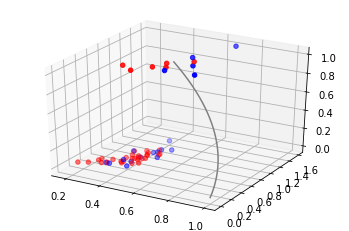

In [196]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
z_line = np.linspace(0, 1, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
#z_points = 15 * np.random.random(100)
z_points = np.column_stack(df_AU45.portion)
x_points = np.column_stack(df_AU45.ratio_no_total)
y_points = np.column_stack(df_AU45.mean_duration)
c_points= ["red","blue"]
cmap = matplotlib.colors.ListedColormap(c_points)
labels=df_AU45.target

#x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
#y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#plt.show()


#x_points = df_AU01.ratio_no_total
#
ax.scatter3D(x_points, y_points, z_points,c=labels,cmap=cmap);

plt.show()



In [197]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
clf.fit(x_train, y_train) 
y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


In [198]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[[10  4]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.20      0.25      0.22         4

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.64      0.61      0.63        18

0.6111111111111112


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [199]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0]
[[10  4]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.33      0.50      0.40         4

    accuracy                           0.67        18
   macro avg       0.58      0.61      0.58        18
weighted avg       0.72      0.67      0.69        18

0.6666666666666666


In [200]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[14  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18

0.7777777777777778


C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [201]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1]
[[8 6]
 [2 2]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.25      0.50      0.33         4

    accuracy                           0.56        18
   macro avg       0.53      0.54      0.50        18
weighted avg       0.68      0.56      0.59        18

0.5555555555555556
